### **Healthcare Trend Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset
Healthcare = pd.read_csv('/content/healthcare_dataset.csv')

In [3]:
print(Healthcare.head())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [4]:
Healthcare.shape

(55500, 15)

In [5]:
Healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
Healthcare.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [7]:
Healthcare['Date of Admission'] = pd.to_datetime(Healthcare['Date of Admission'])
Healthcare['Discharge Date'] = pd.to_datetime(Healthcare['Discharge Date'])

In [8]:
Healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [9]:
Healthcare.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [10]:
Healthcare.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,55500.000000,55500,55500.000000,55500.000000,55500
mean,51.539459,2021-11-01 01:02:22.443243008,25539.316097,301.134829,2021-11-16 13:15:20.821621504
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13241.224652,202.000000,2020-08-12 00:00:00
50%,52.000000,2021-11-01 00:00:00,25538.069376,302.000000,2021-11-17 00:00:00
75%,68.000000,2023-02-03 00:00:00,37820.508436,401.000000,2023-02-18 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00
std,19.602454,NaN,14211.454431,115.243069,NaN


In [11]:
Healthcare.describe(include = "object").T

,count,unique,top,freq
Name,55500,49992,DAvId muNoZ,3
Gender,55500,2,Male,27774
Blood Type,55500,8,A-,6969
Medical Condition,55500,6,Arthritis,9308
Doctor,55500,40341,Michael Smith,27
Hospital,55500,39876,LLC Smith,44
Insurance Provider,55500,5,Cigna,11249
Admission Type,55500,3,Elective,18655
Medication,55500,5,Lipitor,11140
Test Results,55500,3,Abnormal,18627


In [12]:
Healthcare['Blood Type'].value_counts()

,count
Blood Type,
A-,6969
A+,6956
AB+,6947
AB-,6945
B+,6945
B-,6944
O+,6917
O-,6877


In [13]:
Healthcare['Gender'].value_counts()

,count
Gender,
Male,27774
Female,27726


In [14]:
Healthcare['Test Results'].value_counts()

,count
Test Results,
Abnormal,18627
Normal,18517
Inconclusive,18356


In [15]:
Healthcare['Admission Type'].value_counts()

,count
Admission Type,
Elective,18655
Urgent,18576
Emergency,18269


 **Average age of patients?**

In [16]:
average_age = Healthcare['Age'].mean()
print(f"The average age of patients is {average_age:.2f} years.")

The average age of patients is 51.54 years.


**Most common medical condition**

In [17]:
most_common_condition = Healthcare['Medical Condition'].value_counts().idxmax()
print(f"The most common medical condition is {most_common_condition}.")

The most common medical condition is Arthritis.


**Least common medical condition**

In [18]:
least_common_condition = Healthcare['Medical Condition'].value_counts().idxmin()
print(f"The least common medical condition is {least_common_condition}.")

The least common medical condition is Asthma.


**What is the average billing amount for each medical condition?**

In [19]:
avg_billing_by_condition = Healthcare.groupby('Medical Condition')['Billing Amount'].mean()

# Print the average billing amount by medical condition
print("Average billing amount by medical condition:")
for condition, avg_billing in avg_billing_by_condition.items():
    print(f"{condition}: {avg_billing:.2f}")

Average billing amount by medical condition:
Arthritis: 25497.33
Asthma: 25635.25
Cancer: 25161.79
Diabetes: 25638.41
Hypertension: 25497.10
Obesity: 25805.97


**Minimum Billing by Condition**

In [20]:
min_billing_by_condition = Healthcare.groupby('Medical Condition')['Billing Amount'].min()

# Print the minimum billing amount by medical condition
print("Minimum billing amount by medical condition:")
for condition, min_billing in min_billing_by_condition.items():
    print(f"{condition}: {min_billing:.2f}")

Minimum billing amount by medical condition:
Arthritis: -1130.00
Asthma: -1520.42
Cancer: -2008.49
Diabetes: -1316.62
Hypertension: -1660.01
Obesity: -1310.27


**Maximum Billing by Condition**

In [23]:
max_billing_by_condition = Healthcare.groupby('Medical Condition')['Billing Amount'].max()

# Print the maximum billing amount by medical condition
print("Maximum billing amount by medical condition:")
for condition, max_billing in max_billing_by_condition.items():
    print(f"{condition}: {max_billing:.2f}")

Maximum billing amount by medical condition:
Arthritis: 52170.04
Asthma: 52181.84
Cancer: 52373.03
Diabetes: 52211.85
Hypertension: 52764.28
Obesity: 52024.73


In [59]:
# Convert the 'Date of Admission' and 'Discharge Date' to datetime format
Healthcare['Date of Admission'] = pd.to_datetime(Healthcare['Date of Admission'])
Healthcare['Discharge Date'] = pd.to_datetime(Healthcare['Discharge Date'])

# Calculate the length of stay
Healthcare['Length of Stay'] = (Healthcare['Discharge Date'] - Healthcare['Date of Admission']).dt.days

# Group by 'Medical Condition' and calculate the average length of stay for each condition
average_length_of_stay = Healthcare.groupby('Medical Condition')['Length of Stay'].mean().reset_index()

**Which doctor have the most number of admissions?**

In [28]:
doctor_admissions = Healthcare['Doctor'].value_counts().idxmax()
print("Doctor with most admissions: ",doctor_admissions)

Doctor with most admissions:  Michael Smith


**Which doctor have the least number of admissions?**

In [29]:
doctor_admissions = Healthcare['Doctor'].value_counts().idxmin()
print("Doctor with most admissions: ",doctor_admissions)

Doctor with most admissions:  Paul Harding


**What is the distribution of patients across different hospitals?**

In [30]:
hospital_distribution = Healthcare['Hospital'].value_counts()
print("Distribution of patients across hospitals: ", hospital_distribution)

Distribution of patients across hospitals:  Hospital
LLC Smith                      44
Ltd Smith                      39
Johnson PLC                    38
Smith Ltd                      37
Smith PLC                      36
                               ..
and Montoya Flores, Boyer       1
Carter and Dunn King,           1
Hall, Brown Black and           1
Peterson Scott and Thomas,      1
Moreno Murphy, Griffith and     1
Name: count, Length: 39876, dtype: int64


**How many unique hospitals are included in the dataset?**

In [31]:
unique_hospitals = Healthcare['Hospital'].nunique()
print(f"There are {unique_hospitals} unique hospitals included in the dataset.")

There are 39876 unique hospitals included in the dataset.


**Who is the oldest patient in the dataset, and what is their age?**

In [32]:
oldest_patient_age = Healthcare['Age'].max()
oldest_patient_name = Healthcare[Healthcare['Age'] == oldest_patient_age]['Name'].iloc[0]
print(f"The oldest patient in the dataset is {oldest_patient_name} with an age of {oldest_patient_age} years.")

The oldest patient in the dataset is DAVId NeWTOn with an age of 89 years.


**Who is the Youngest patient in the dataset, and what is their age?**

In [33]:
youngest_patient_age = Healthcare['Age'].min()
youngest_patient_name = Healthcare[Healthcare['Age'] == youngest_patient_age]['Name'].iloc[0]
print(f"The youngest patient in the dataset is {youngest_patient_name} with an age of {youngest_patient_age} years.")

The youngest patient in the dataset is jamES BasS phD with an age of 13 years.


**What is the most frequently prescribed medication?**

In [38]:
most_prescribed_medication = Healthcare['Medication'].value_counts().idxmax()
print(f"The most frequently prescribed medication is {most_prescribed_medication}.")

The most frequently prescribed medication is Lipitor.


**What is the most frequently prescribed medication?**

In [37]:
least_prescribed_medication = Healthcare['Medication'].value_counts().idxmin()
print(f"The least prescribed medication is {least_prescribed_medication}.")

The least prescribed medication is Penicillin.


**What is the average billing amount for patients?**

In [39]:
average_billing_amount = Healthcare['Billing Amount'].mean()
print(f"The average billing amount for patients is ${average_billing_amount:.2f}.")

The average billing amount for patients is $25539.32.


**What is the max billing amount for patients**

In [41]:
max_billing_amount = Healthcare['Billing Amount'].max()
print(f"The average billing amount for patients is ${max_billing_amount:.2f}.")

The average billing amount for patients is $52764.28.


**What is the min billing amount for patients**

In [42]:
min_billing_amount = Healthcare['Billing Amount'].min()
print(f"The average billing amount for patients is ${min_billing_amount:.2f}.")

The average billing amount for patients is $-2008.49.


**How many male and female patients are there?**

In [43]:
male_patients = Healthcare[Healthcare['Gender'] == 'Male'].shape[0]
female_patients = Healthcare[Healthcare['Gender'] == 'Female'].shape[0]
print(f"There are {male_patients} Male patients and {female_patients} Female patients.")

There are 27774 Male patients and 27726 Female patients.


**What are the top three most common medical conditions for which patients are admitted?**

In [44]:
top_three_medical_conditions = Healthcare['Medical Condition'].value_counts().head(3)
print("Top Three Most Common Medical Conditions:")
print(top_three_medical_conditions)

Top Three Most Common Medical Conditions:
Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Name: count, dtype: int64


**What are the top three least common medical conditions for which patients are admitted?**

In [57]:
# Calculate the frequency of each medical condition
condition_counts = Healthcare['Medical Condition'].value_counts()

# Get the three least common medical conditions
least_common_conditions = condition_counts.nsmallest(3)

# Display the result
print(least_common_conditions)

Medical Condition
Asthma     9185
Cancer     9227
Obesity    9231
Name: count, dtype: int64


**Monthly admissions trend**

<Figure size 1200x600 with 0 Axes>

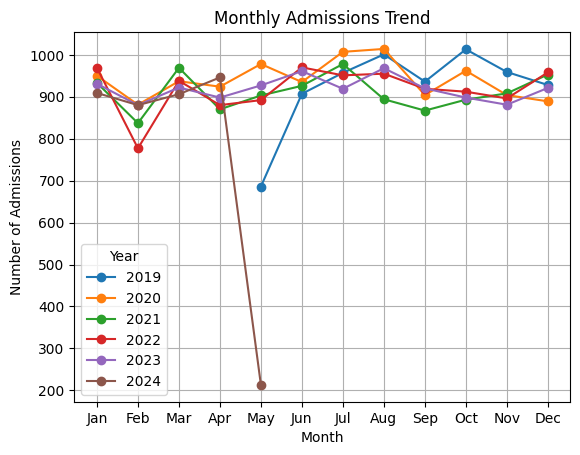

In [45]:
Healthcare['Date of Admission'] = pd.to_datetime(Healthcare['Date of Admission'], errors='coerce')
Healthcare['Discharge Date'] = pd.to_datetime(Healthcare['Discharge Date'], errors='coerce')

Healthcare['Admission Year'] = Healthcare['Date of Admission'].dt.year
Healthcare['Admission Month'] = Healthcare['Date of Admission'].dt.month
Healthcare['Admission Day'] = Healthcare['Date of Admission'].dt.day
Healthcare['Admission Weekday'] = Healthcare['Date of Admission'].dt.weekday

monthly_admissions = Healthcare.groupby(['Admission Year', 'Admission Month']).size().reset_index(name='Counts')

monthly_admissions_pivot = monthly_admissions.pivot(index='Admission Month', columns='Admission Year', values='Counts')

plt.figure(figsize=(12, 6))
monthly_admissions_pivot.plot(kind='line', marker='o')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Monthly Admissions Trend')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.legend(title='Year')
plt.grid(True)
plt.show()

**Weekly admissions trend**

<Figure size 1200x600 with 0 Axes>

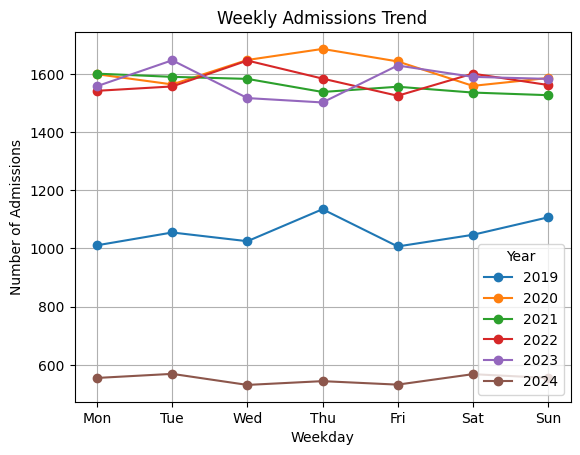

In [46]:
weekly_admissions = Healthcare.groupby(['Admission Year', 'Admission Weekday']).size().reset_index(name='Counts')
weekly_admissions_pivot = weekly_admissions.pivot(index='Admission Weekday', columns='Admission Year', values='Counts')

plt.figure(figsize=(12, 6))
weekly_admissions_pivot.plot(kind='line', marker='o')
plt.title('Weekly Admissions Trend')
plt.xlabel('Weekday')
plt.ylabel('Number of Admissions')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

**Age Distribution**

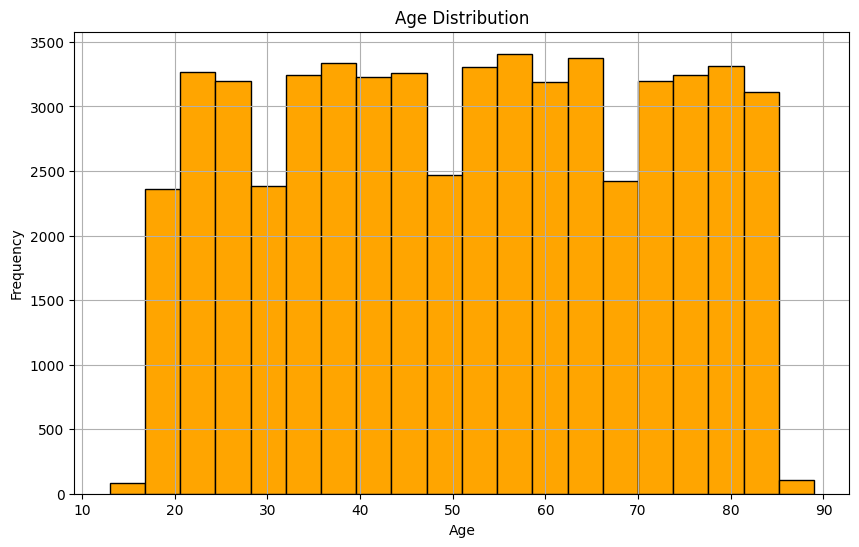

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(Healthcare['Age'], bins=20, color='orange', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Billing Amount**

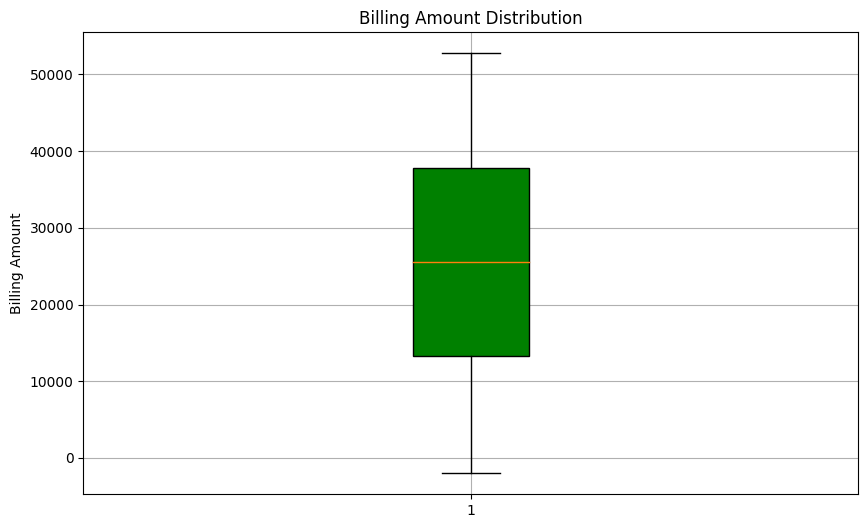

In [48]:
plt.figure(figsize=(10, 6))
plt.boxplot(Healthcare['Billing Amount'], patch_artist=True, boxprops=dict(facecolor='green', color='black'))
plt.title('Billing Amount Distribution')
plt.ylabel('Billing Amount')
plt.grid(True)
plt.show()

**Monthly Admissions and Discharges**

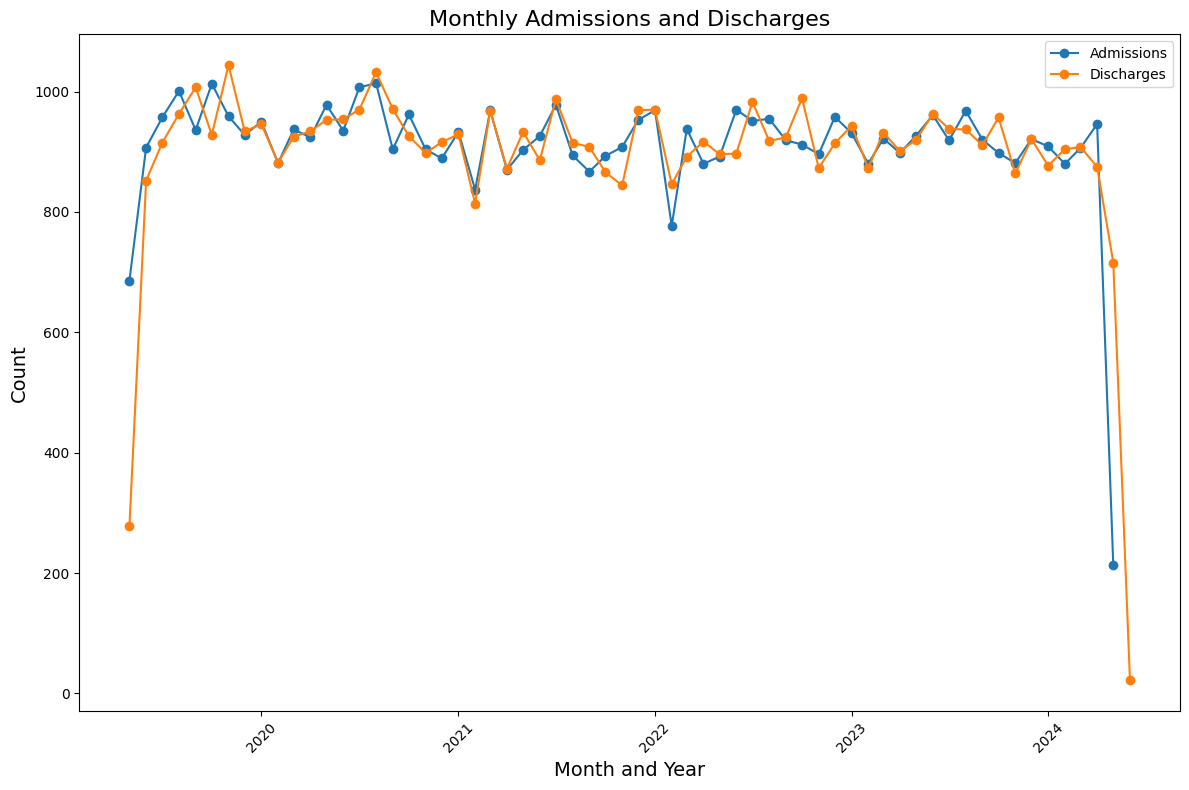

In [56]:
# Convert the 'Date of Admission' and 'Discharge Date' to datetime format
Healthcare['Date of Admission'] = pd.to_datetime(Healthcare['Date of Admission'])
Healthcare['Discharge Date'] = pd.to_datetime(Healthcare['Discharge Date'])

# Extract the month and year for admissions and discharges
Healthcare['Admission Month'] = Healthcare['Date of Admission'].dt.to_period('M')
Healthcare['Discharge Month'] = Healthcare['Discharge Date'].dt.to_period('M')

# Group by the month and year to count the number of admissions and discharges
monthly_admissions = Healthcare.groupby('Admission Month').size()
monthly_discharges = Healthcare.groupby('Discharge Month').size()

# Convert the PeriodIndex to datetime for plotting
monthly_admissions.index = monthly_admissions.index.to_timestamp()
monthly_discharges.index = monthly_discharges.index.to_timestamp()

plt.figure(figsize=(12, 8))
plt.plot(monthly_admissions.index, monthly_admissions, label='Admissions', marker='o')
plt.plot(monthly_discharges.index, monthly_discharges, label='Discharges', marker='o')

# Set the title and labels
plt.title('Monthly Admissions and Discharges', fontsize=16)
plt.xlabel('Month and Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

**Medical Condition Distribution By Gender**

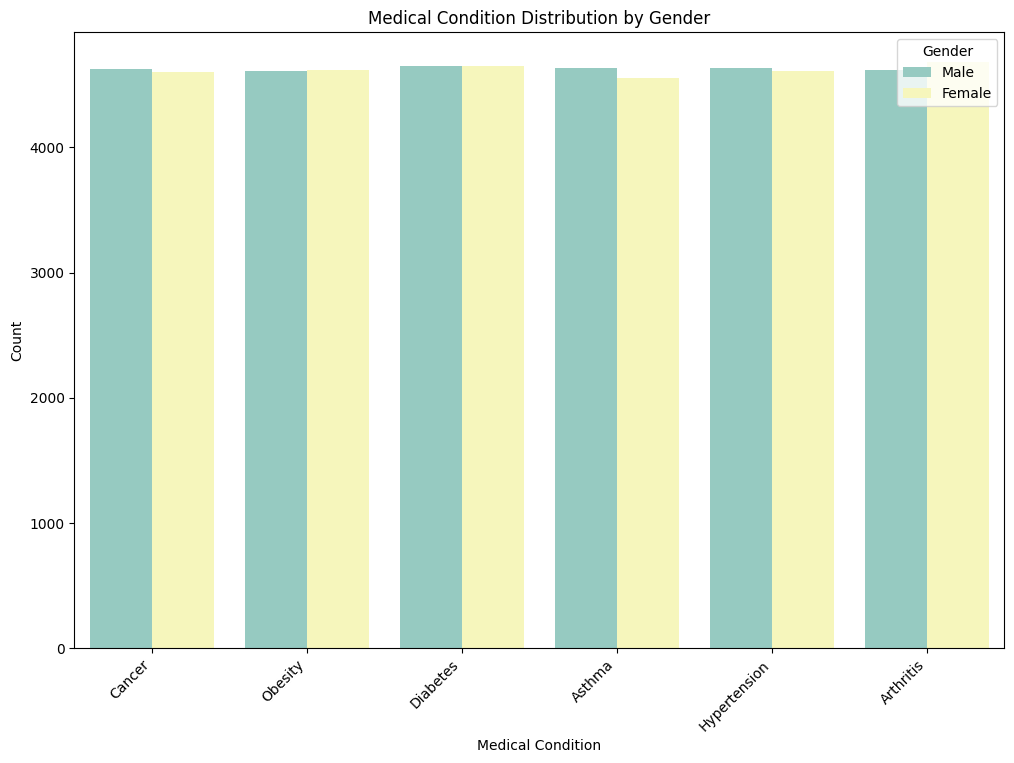

In [52]:
import seaborn as sns

# Plot count plot for Gender vs. Medical Condition
plt.figure(figsize=(12, 8))
sns.countplot(data=Healthcare, x='Medical Condition', hue='Gender', palette='Set3')
plt.title('Medical Condition Distribution by Gender')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

**Age Distribution by Medical Condition**

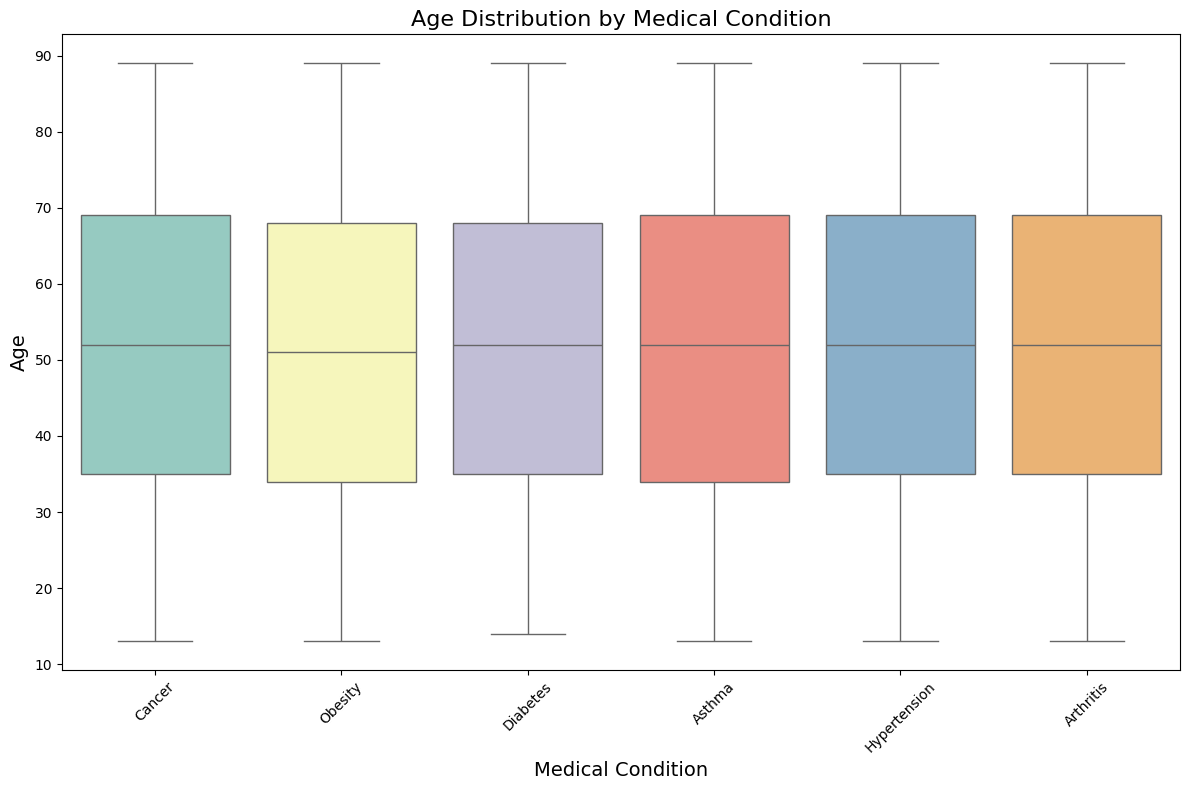

In [54]:
# Create the boxplot for age distribution by medical condition
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Medical Condition', y='Age', data=Healthcare, palette="Set3")

# Set the title and labels
ax.set_title('Age Distribution by Medical Condition', fontsize=16)
ax.set_xlabel('Medical Condition', fontsize=14)
ax.set_ylabel('Age', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()
